In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
working_directory = pd.read_csv('2281305.csv')
working_directory
data = working_directory[['DATE','TMP']]
data
data1 = data['DATE'].str.split('-',expand=True)
data2 = data['TMP'].str.split(',',expand = True)
data3 = pd.merge(data1,data2,left_index=True,right_index=True)
data3.columns=['Year','Month','Daytime','Air_temperature','Air_temperature_quality_code']
data4 = data3.drop(columns='Daytime')
data4 = data4.astype('int')
data5 = data4[~data4['Air_temperature'].isin([+9999])]
data6 = data5.drop(index=data5[data5['Air_temperature_quality_code']!='1'].index[0])
data_final = data6.drop(columns='Air_temperature_quality_code')
data_final

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Month,Air_temperature
1,2010,1,170
2,2010,1,180
3,2010,1,192
4,2010,1,180
5,2010,1,170
...,...,...,...
111979,2020,9,290
111980,2020,9,290
111981,2020,9,290
111982,2020,9,290


<AxesSubplot:xlabel='Year,Month'>

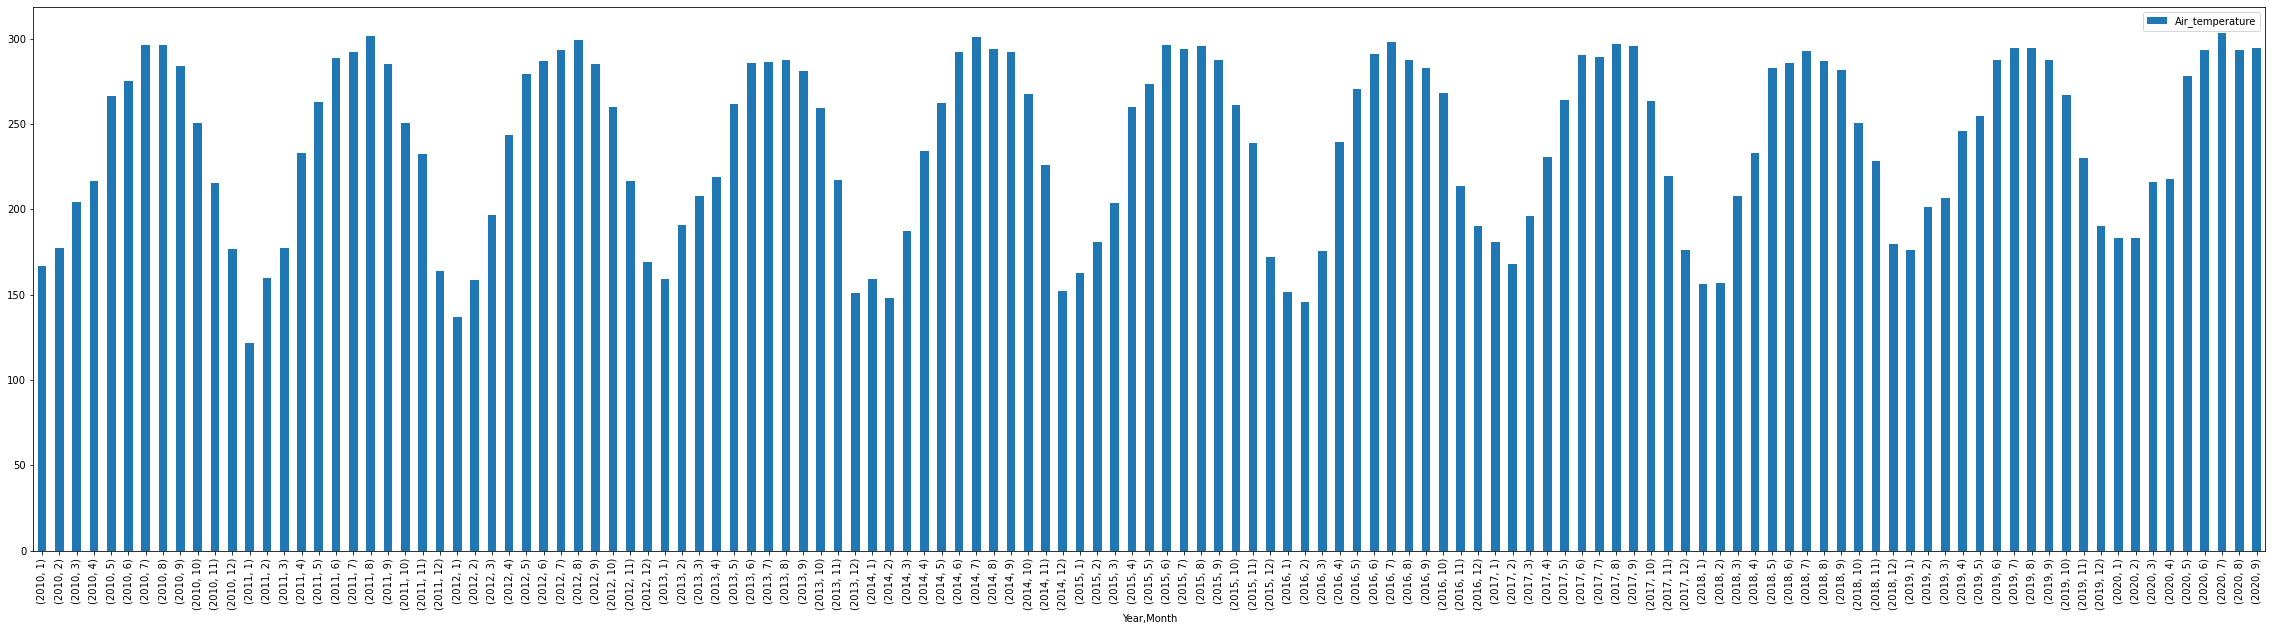

In [5]:
ave = data_final.groupby(['Year','Month']).agg('mean')
ave.plot.bar(figsize=(40,10))

<AxesSubplot:xlabel='Month,Year'>

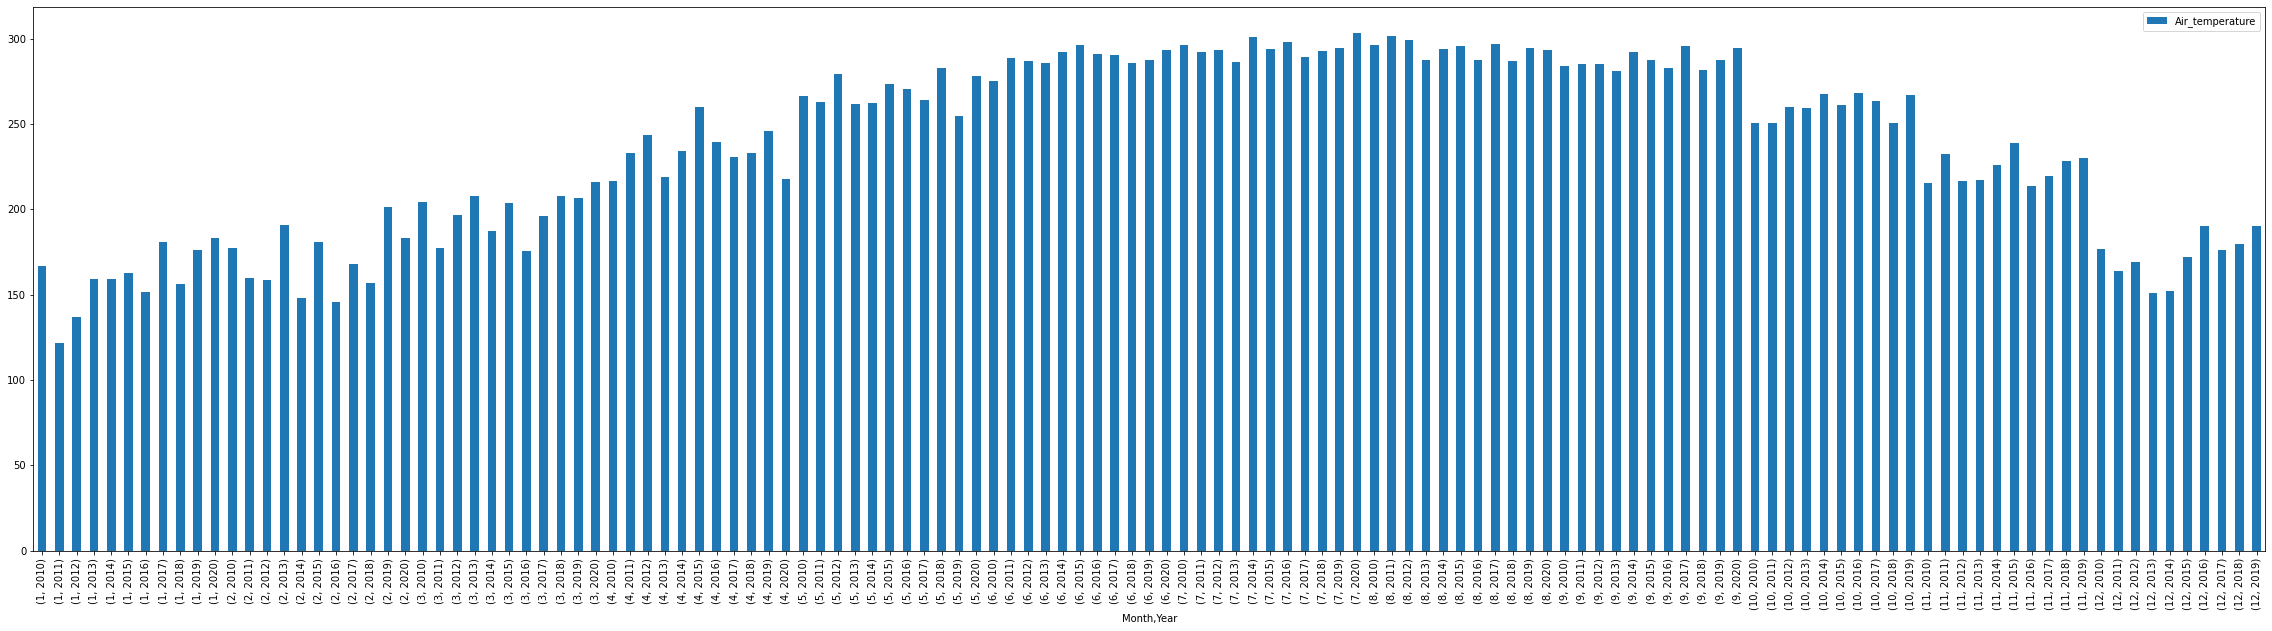

In [9]:
ave1 = data_final.groupby(['Month','Year']).agg('mean')
ave1.plot.bar(figsize=(40,10))